<a href="https://colab.research.google.com/github/Aniket0325/Aerofit_Project/blob/main/Aerofit_Business_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aniket Chavan**
---


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
!gdown 1AmduHh1Tx4aBGXBqWA4Sue3wAUMlJexY

Downloading...
From: https://drive.google.com/uc?id=1AmduHh1Tx4aBGXBqWA4Sue3wAUMlJexY
To: /content/aerofit.csv
100% 7.28k/7.28k [00:00<00:00, 19.9MB/s]


In [4]:
df = pd.read_csv('aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# **Q1 Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

**Q1.1 The data type of all columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Q1.2 the number of rows and columns given in the dataset**

In [6]:
df.shape

(180, 9)

**Q1.3 Check for the missing values and find the number of missing values in each column**

In [7]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#**Q2 Detect Outliers**

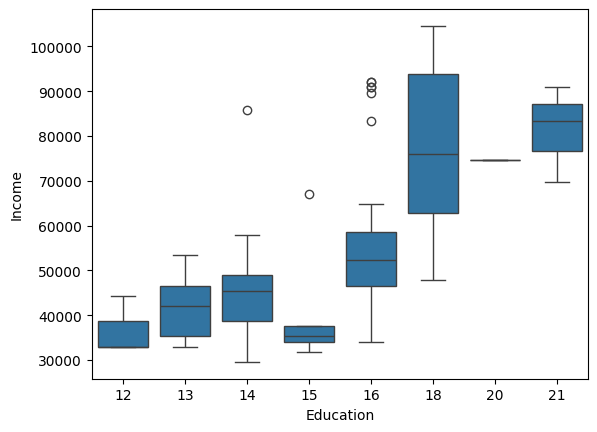

In [9]:
sns.boxplot(data = df, x = 'Education', y = 'Income' )
plt.show()

Quick Analysis - Boxplot gives us fare idea about the education wise income level. We can easily compare median values which shows that 16+ i.e. 16, 18, 20, 21 has good income level above 50k. Also there are some outliers in age group of 14, 15, 16 who has income 60K+.

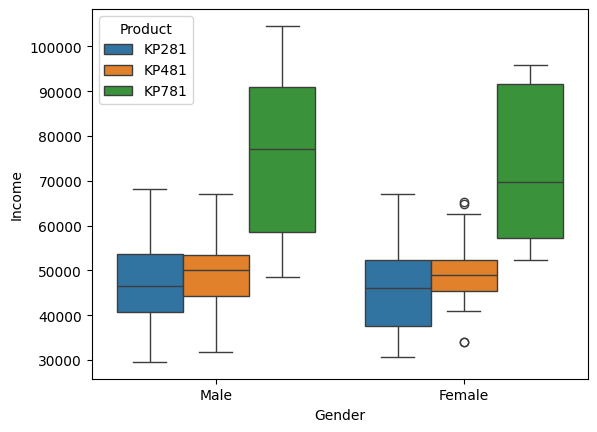

In [10]:
sns.boxplot(data = df, x = 'Gender', y = 'Income', hue = 'Product')
plt.show()

Quick Analysis - Among both the genders, whoever have higher income level goes for KP781 trademill. All others having moderate income prefer KP281 trademill over KP481 as we can see here that KP281 has wider boundries. Males with higher income prefer more KP781 trademill than female.

**Q2.1 Find the outliers for every continuous variable in the dataset**

In [11]:
numerical_columns = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
z_threshold = 3
z_scores = pd.DataFrame()
for col in numerical_columns:
    z_scores[col] = (df[col] - df[col].mean()) / df[col].std()

outliers_z = df[abs(z_scores) > z_threshold].drop_duplicates()
outliers_z

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,300.0
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.0
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103336.0,NaN
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104581.0,NaN


# **Q3 Check if features like marital status, Gender, and age have any effect on the product purchased**

**Q3.1 Find if there is any relationship between the categorical variables and the output variable in the data**

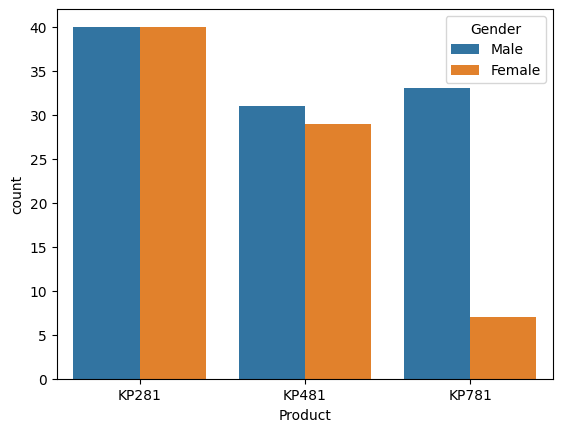

In [12]:
sns.countplot(data = df, x = df['Product'], hue = df['Gender'])
plt.show()

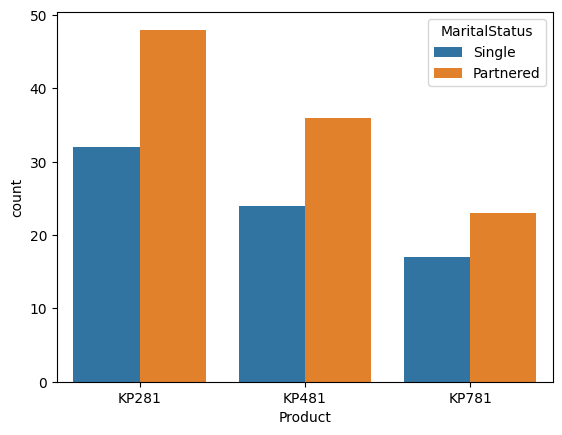

In [13]:
sns.countplot(data = df, x = df['Product'], hue = df['MaritalStatus'])
plt.show()

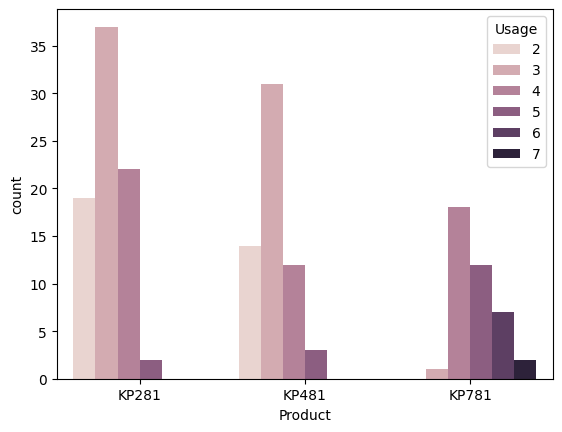

In [14]:
sns.countplot(data = df, x = df['Product'], hue = df['Usage'])
plt.show()

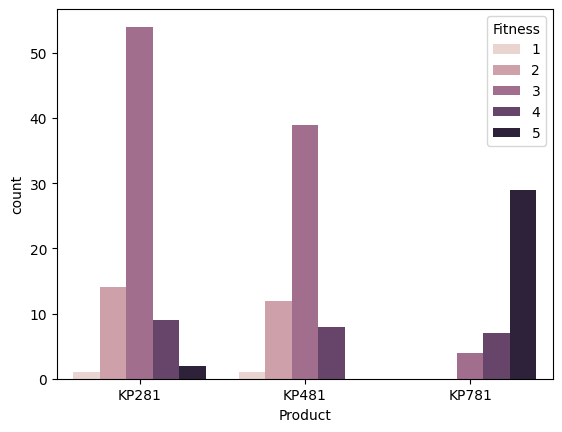

In [15]:
sns.countplot(data = df, x = df['Product'], hue = df['Fitness'])
plt.show()

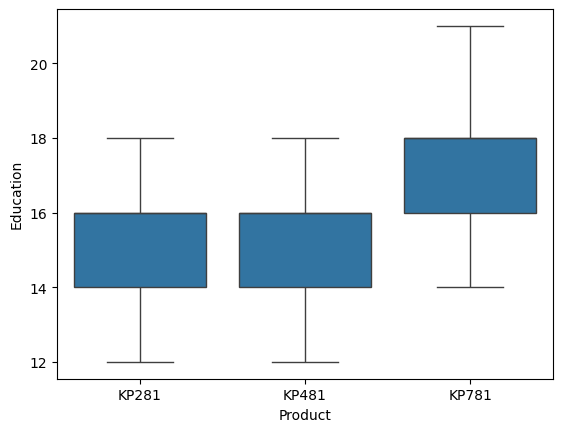

In [16]:
sns.boxplot(data = df, x = 'Product',y = 'Education')
plt.show()

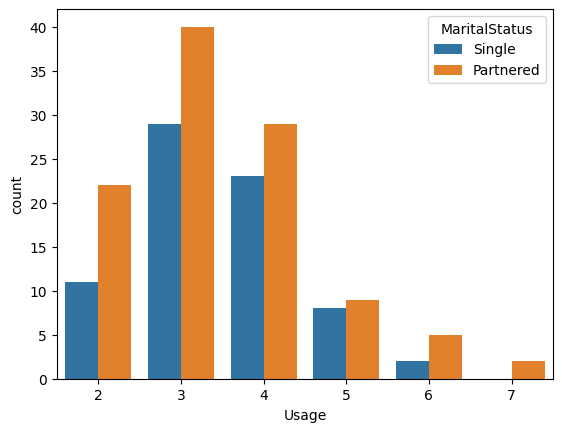

In [17]:
sns.countplot(data = df,x = 'Usage', hue = 'MaritalStatus')
plt.show()

**Q3.2 Find if there is any relationship between the continuous variables and the output variable in the data**

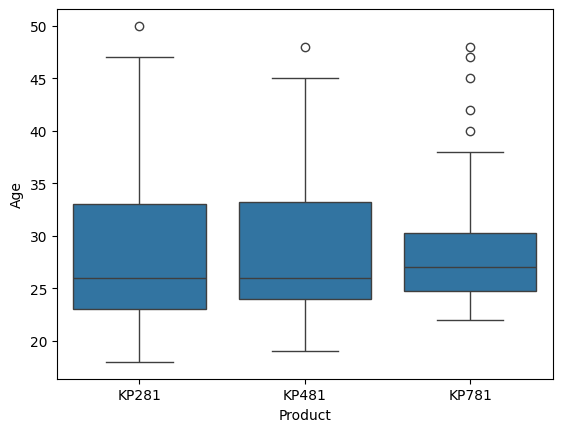

In [18]:
sns.boxplot(data = df, x = 'Product',y = 'Age')
plt.show()

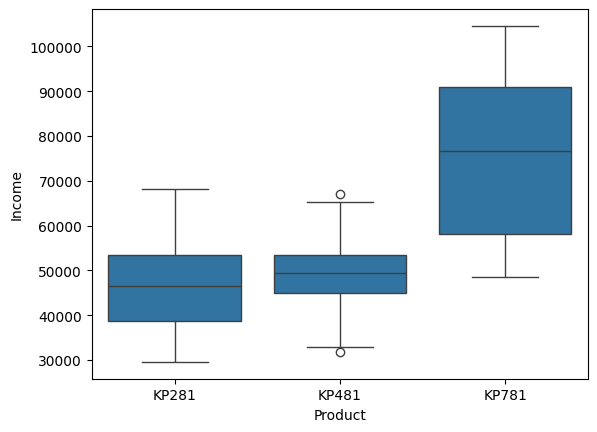

In [19]:
sns.boxplot(data = df, x = 'Product',y = 'Income')
plt.show()

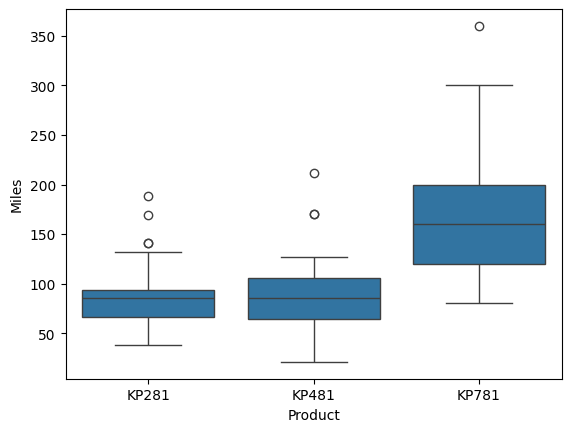

In [20]:
sns.boxplot(data = df, x = 'Product',y = 'Miles')
plt.show()

# **Q4 Representing the Probability**

**Q4.1 Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)**

In [21]:
pd.crosstab(index = df["Gender"], columns = df["Product"], margins = True, normalize = True).round(2)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.0,16.0,4.0,42.0
Male,22.0,17.0,18.0,58.0
All,44.0,33.0,22.0,100.0


**Q4.2 Find the probability that the customer buys a product based on each column**

In [22]:
def distribution(col_name):
    return df[col_name].value_counts(normalize = True).round(4)*100

In [23]:
columns_to_count = ["Product", "Age", "Gender", "Education", "MaritalStatus", "Usage", "Fitness", "Income", "Miles"]
for col in columns_to_count:
    print(f"Probability counts for {col}: \n{distribution(col)}\n")

Probability counts for Product: 
Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

Probability counts for Age: 
Age
25    13.89
23    10.00
24     6.67
26     6.67
28     5.00
35     4.44
33     4.44
30     3.89
38     3.89
21     3.89
22     3.89
27     3.89
31     3.33
34     3.33
29     3.33
20     2.78
40     2.78
32     2.22
19     2.22
48     1.11
37     1.11
45     1.11
47     1.11
46     0.56
50     0.56
18     0.56
44     0.56
43     0.56
41     0.56
39     0.56
36     0.56
42     0.56
Name: proportion, dtype: float64

Probability counts for Gender: 
Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64

Probability counts for Education: 
Education
16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
12     1.67
21     1.67
20     0.56
Name: proportion, dtype: float64

Probability counts for MaritalStatus: 
MaritalStatus
Partnered    59.44
Single       40.56
Name: proportion, dtype: float64

Probability counts for U

**Q4.3 given that a customer is female, what is the probability
she’ll purchase a KP481**

In [24]:
df_KP481 = df.loc[(df['Product'] == 'KP481')]
Probablity_KP481_Female = len(df_KP481.loc[(df_KP481['Gender'] == 'Female')])/len(df.loc[(df['Gender'] == 'Female')])
print('Probablity_KP481_Female = ',round(Probablity_KP481_Female,2))

Probablity_KP481_Female =  0.38


# **Q5 Check the correlation among different factors**

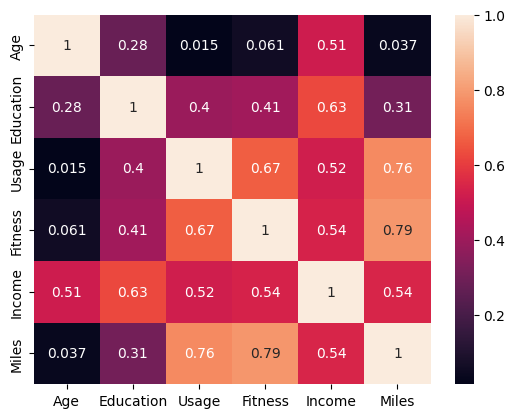

In [25]:
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

# **Q6 Customer profiling and recommendation**

In [26]:
gender_product = pd.crosstab(df['Gender'], df['Product'])
conditional_prob_gender = gender_product.div(gender_product.sum(axis=1), axis=0)
conditional_prob_gender

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [27]:
age_bins = [18, 24, 30, 36, 42, 48, 52, float('inf')]
age_labels = ['18-24', '25-30', '31-36', '37-42', '43-48', '49-52','52+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [28]:
age_product = pd.crosstab(df['AgeGroup'], df['Product'])
conditional_prob_age = age_product.div(age_product.sum(axis=1), axis=0)
conditional_prob_age

Product,KP281,KP481,KP781
AgeGroup,,,
18-24,0.523810,0.333333,0.142857
25-30,0.436620,0.267606,0.295775
31-36,0.333333,0.487179,0.179487
37-42,0.529412,0.352941,0.117647
43-48,0.500000,0.125000,0.375000
49-52,0.333333,0.333333,0.333333


In [29]:
income_bins = [28000, 45000, 50000, 60000, float('inf')]
income_labels = ['Low', 'Below Average', 'Above Average', 'High']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

In [30]:
income_product = pd.crosstab(df['Income_Group'], df['Product'])
conditional_prob_income = income_product.div(income_product.sum(axis=1), axis=0)
conditional_prob_income

Product,KP281,KP481,KP781
Income_Group,,,
Low,0.693878,0.306122,0.000000
Below Average,0.411765,0.441176,0.147059
Above Average,0.472727,0.418182,0.109091
High,0.142857,0.166667,0.690476


**Recomendation-**



**Dataset Observations and Data Pre-processing:**

Dataset: 180 rows, 9 columns.

Data Quality: No null values in rows or columns, ensuring reliability.

Detected outliers in the data using z-scores. Consider removing these rows to enhance the accuracy of our analysis.

Added Columns: Binned Age and Income for enhanced analysis.

Calculated mean, median, std. dev., min, max for Age, Education, Usage, Income, Fitness, Miles within each product category.

**Observations from the Analysis:**

Customers bought the products in the following quantities: KP281 (80), KP481 (60), and KP781 (40).

KP281 has the highest probability of being purchased (0.444), indicating that it's the most preferred product among the customers. KP481 has a slightly lower probability of being purchased (0.333), making it the second most preferred product. KP781 has the lowest probability of being purchased (0.222), suggesting that it's the least preferred product among the customers.

The countplot indicates a nearly equal distribution of purchases between males and females for the KP281 and KP481 models.

Only 17.5% of the people who purchased the KP781 treadmill are women. This treadmill is known for its advanced features and costs $2,500.
These premium features and higher price could be appealing to a specific group of people, possibly more men. This might be because of what men generally like, what they require, or what they can afford. How the product is presented in the market and advertised can also influence who chooses to buy it. If the marketing focuses on aspects that attract men, it could explain why more men bought it than women.

Married individuals not only show a greater inclination to purchase the product across all models but also tend to utilize the product more frequently in comparison to their single counterparts.

KP781 stands out with a distinctive usage-related trend unlike KP281 and KP481. As usage increases, the purchase percentages for KP281 and KP481 decline; however, for KP781, there is a notable upward trend in purchase percentage. This indicates that customers with higher usage preferences show a stronger inclination towards purchasing KP781.

KP281 and KP481 models are preferred by individuals with moderate fitness levels (3), while KP781 is favored by experienced fitness enthusiasts (5).
Higher education levels, elevated income levels, and greater distances covered in miles are all positively associated with an augmented probability of purchasing the KP781 model. Similarly, a subtle distinction exists between the purchase tendencies of KP281 and KP481.
The age range of 18 to 36 encompasses 84% of product purchasers across all models, suggesting a strong preference for this age group.


**Customer Profiling for KP281 and KP481:**

Customers show a similar level of interest in both KP281 and KP481 due to their thin differences across various analyses and similar pricing. The thin differences in various analyses and the comparable pricing of KP281 and KP481 suggest that these two models might share similar features and functionalities, making them appealing to a similar customer segment.
KP481 slightly outperforms KP281 in terms of customer attraction based on income. This suggests that customers with relatively higher incomes might have a preference for KP481.

KP481 is also slightly more attractive to customers based on the average number of miles they expect to walk/run each week. This implies that customers with higher distance-related fitness goals might lean towards KP481.

Age, education, usage frequency, and self-rated fitness levels have similar impacts on customer attraction for both KP281 and KP481. These factors don't seem to significantly differentiate between the two models.

**Customer Profiling for KP781:**

The KP781 treadmill is special among the three models, being priced higher and having more advanced features. This makes it stand out and attracts a certain type of customer. People who have a good income, want to use the treadmill a lot, plan to run longer distances, and rate themselves as very fit are more likely to find value in the KP781.

For customers who highly prioritize advanced features, frequent usage, and intense fitness engagement, the KP781 model offers an appealing chance for an upgrade.